<a href="https://colab.research.google.com/github/erikspone/COGS118B/blob/main/PCA_final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# *Final project*




### PCA



In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import glob
import cv2
from IPython.display import display
from IPython.display import Image as _Imgdis
from PIL import Image
from matplotlib import image, pyplot as plt
import glob
from google.colab import drive
drive.mount('/content/gdrive')
from sklearn.preprocessing import normalize





Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
## Defining the dimension
D = 400
N = 50

In [ ]:
image = Image.open('../content/gdrive/MyDrive/normal/IM-0001-0001.jpeg') 
print(image.size)
print(image.mode)
image=image.resize((D,D))
print(image.size)
image_array = np.asarray(image)
print(image_array.shape)


(1857, 1317)
L
(400, 400)
(400, 400)


In [ ]:
## to view one x-ray
def viewcolumn(columnvector):
    plt.imshow(columnvector.reshape(
        [400, 400], order='F'), cmap=plt.get_cmap('gray'))
    plt.show()

In [ ]:
## import data
lungs_n = np.empty((D*D, N))
lungs_s = np.empty((D*D, N))
normal_imgs = glob.glob("../content/gdrive/MyDrive/normal/*.jpeg")
sick_imgs = glob.glob("../content/gdrive/MyDrive/pneumonia/*.jpeg")

# add N x-rays
for i in range(N):
  # resize normal x-rays and put in array
  im = normal_imgs[i]
  with open(normal_imgs[i], 'rb') as file:
    img = Image.open(file)
    img = img.resize((D,D))
    img_array = np.asarray(img).T
    img_array= img_array.flatten().T
    lungs_n[:,i] = img_array

  # resize pneumonia x-rays and put in array
  with open(sick_imgs[i], 'rb') as file:
    img = Image.open(file)
    img = img.resize((D,D))
    img_array = np.asarray(img).T
    img_array= img_array.flatten().T
    lungs_s[:,i] = img_array

(160000, 50)
X-ray of a normal lung:


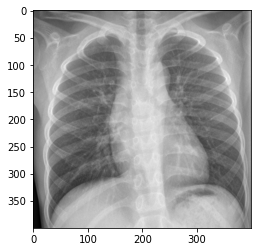

In [ ]:
print(lungs_n.shape)
print('X-ray of a normal lung:')
viewcolumn(lungs_n[:,0])

X-ray of a lung with pneumonia:


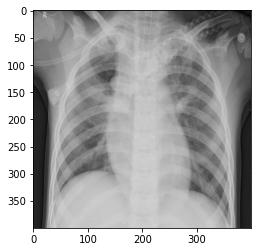

In [ ]:
print('X-ray of a lung with pneumonia:')
viewcolumn(lungs_s[:,0])

Mean normal long:


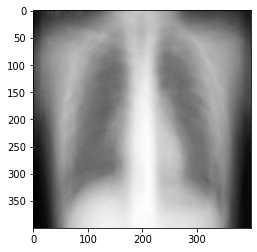

In [ ]:
mean_n = np.mean(lungs_n, axis=1)[:, None]
print('Mean normal long:')
viewcolumn(mean_n)

Mean lung with pneumonia:


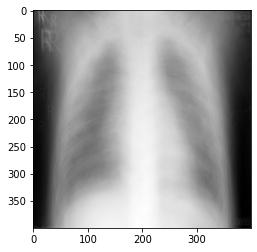

In [ ]:
mean_s = np.mean(lungs_s, axis=1)[:, None]
print('Mean lung with pneumonia:')
viewcolumn(mean_s)

In [ ]:
def eigsort(V, eigvals):

    # Sort the eigenvalues from largest to smallest. Store the sorted
    # eigenvalues in the column vector lambd.
    lohival = np.sort(eigvals)
    lohiindex = np.argsort(eigvals)
    lambd = np.flip(lohival)
    ##print('lambda', lambd)
    index = np.flip(lohiindex)
    ##print('index', index)
    Dsort = np.diag(lambd)

    # Sort eigenvectors to correspond to the ordered eigenvalues. Store sorted
    # eigenvectors as columns of the matrix vsort.
    M = np.size(lambd)
    Vsort = np.zeros((M, M))
    for i in range(M):
        Vsort[:, i] = V[:, index[i]]
    return Vsort, Dsort

In [ ]:
A_n = lungs_n - mean_n
cov_n = np.divide(A_n.T@A_n, N)

A_s = lungs_s - mean_s
cov_s = np.divide(A_s.T@A_s, N)


In [ ]:
eigvals_n, V_n = np.linalg.eig(cov_n)
Vsort_n, Dsort_n = eigsort(V_n, eigvals_n)
print('vsort n shape, dsort n shape', Vsort_n.shape, Dsort_n.shape)

eigvals_s, V_s = np.linalg.eig(cov_s)
Vsort_s, Dsort_s = eigsort(V_s, eigvals_s)
print('vsort s shape, dsort s shape', Vsort_s.shape, Dsort_s.shape)

vsort n shape, dsort n shape (50, 50) (50, 50)
vsort s shape, dsort s shape (50, 50) (50, 50)


In [ ]:
def normc(Mat):
    return normalize(Mat, norm='l2', axis=0)

In [ ]:
U_n = A_n@V_n
U_n = normc(U_n)

U_s = A_s@V_s
U_s = normc(U_s)

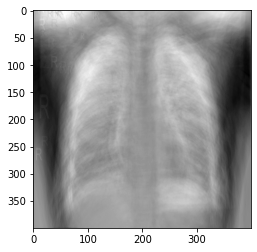

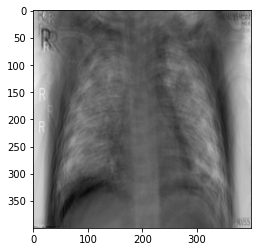

In [ ]:
## First eigenlung
viewcolumn(U_n[:,0])
viewcolumn(U_s[:,0])

Normal lungs:


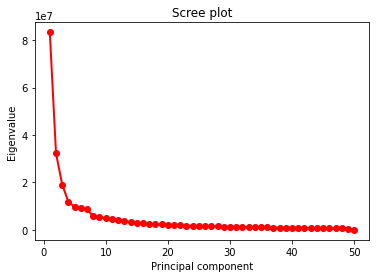

In [ ]:
## Scree plot normal lungs
print('Normal lungs:')
singvals = np.arange(len(eigvals_n)) + 1
plt.plot(singvals, np.diag(Dsort_n), 'ro-', linewidth=2)
plt.title('Scree plot')
plt.xlabel('Principal component')
plt.ylabel('Eigenvalue')
plt.show()

Lungs with pneumonia:


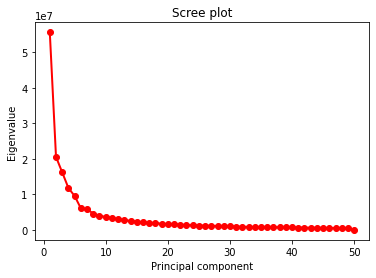

In [ ]:
print('Lungs with pneumonia:')
singvals = np.arange(len(eigvals_s)) + 1
plt.plot(singvals, np.diag(Dsort_s), 'ro-', linewidth=2)
plt.title('Scree plot')
plt.xlabel('Principal component')
plt.ylabel('Eigenvalue')
plt.show()

Normal lung before any reduction:


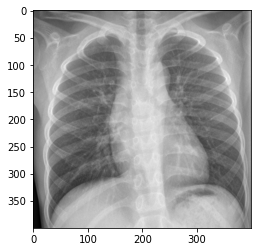

Reconstructed first normal x-ray
with all of the principle components:


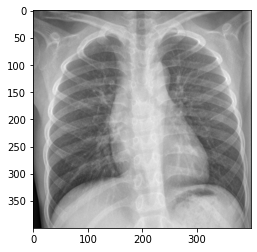

Reconstructed first normal x-ray with
just the first four principle components: 


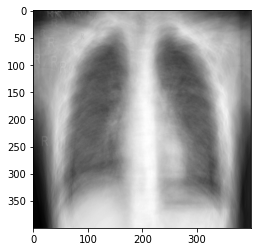

Reconstructed first normal x-ray
with just the four two principle components


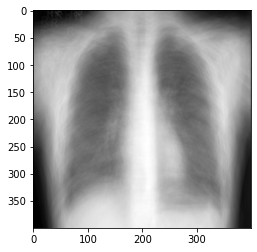

In [ ]:
#first x-ray of a normal lung
print('Normal lung before any reduction:')
viewcolumn(lungs_n[:,0])

# Reconstructed first normal x-ray with all of them 
print('Reconstructed first normal x-ray\nwith all of the principle components:')
c_n = U_n.T @ (lungs_n[:, 0][:, None] - mean_n)
zhat_n = U_n @ c_n + mean_n
viewcolumn(zhat_n)

# Reconstructed first normal x-ray with just the first four principle components 
print('Reconstructed first normal x-ray with\njust the first four principle components: ')
zhat_n = U_n[:,:3] @ c_n[:3] + mean_n
viewcolumn(zhat_n)

# Reconstructed first normal x-ray with just the four two principle components 
print('Reconstructed first normal x-ray\nwith just the four two principle components')
zhat_n = U_n[:,:1] @ c_n[:1] + mean_n
viewcolumn(zhat_n)

Pneumonia lung before any reduction:


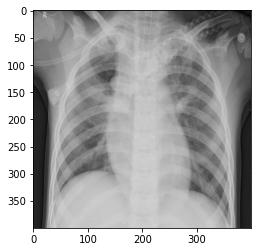

(160000,)
Reconstructed first pneumonia x-ray with all of the principle components


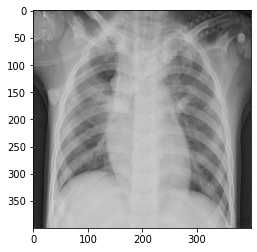

Reconstructed first pneumonia x-ray with just the first four principle components: 


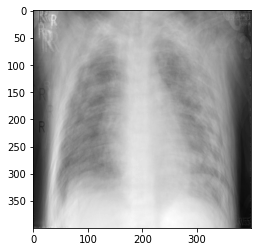

Reconstructed first pneumonia x-ray with just the four two principle components


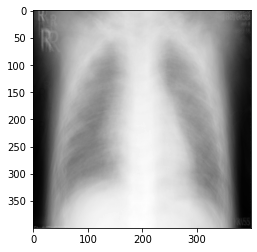

In [ ]:
#first x-ray of a pneumonia lung
print('Pneumonia lung before any reduction:')
viewcolumn(lungs_s[:,0])
print(lungs_s[:,0].shape)

# Reconstructed first pneumonia x-ray with all of the principle components 
print('Reconstructed first pneumonia x-ray with all of the principle components')
c_s = U_s.T @ (lungs_s[:, 0][:, None] - mean_s)
zhat_s = U_s @ c_s + mean_s
viewcolumn(zhat_s)

# Reconstructed first pneumonia x-ray with just the first four principle components 
print('Reconstructed first pneumonia x-ray with just the first four principle components: ')
zhat_s = U_s[:,:3] @ c_s[:3] + mean_s
viewcolumn(zhat_s)

# Reconstructed first pneumonia x-ray with just the four two principle components 
print('Reconstructed first pneumonia x-ray with just the four two principle components')
zhat_s = U_s[:,:1] @ c_s[:1] + mean_s
viewcolumn(zhat_s)

Reconstructed first pneumonia x-ray with all of the principle components of normal lungs


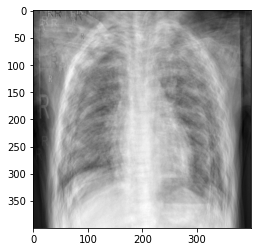

Reconstructed first normal x-ray with all of the principle components of pneumonia lungs


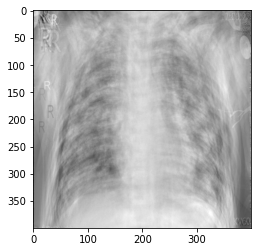

In [ ]:
# Reconstructed first pneumonia x-ray with all of the principle components of normal lungs
print('Reconstructed first pneumonia x-ray with all of the principle components of normal lungs')
c = U_n.T @ (lungs_s[:, 0][:, None] - mean_n)
zhat = U_n @ c + mean_n
viewcolumn(zhat)

# Reconstructed first normal x-ray with all of the principle components of pneumonia lungs
print('Reconstructed first normal x-ray with all of the principle components of pneumonia lungs')
c = U_s.T @ (lungs_n[:, 0][:, None] - mean_s)
zhat = U_s @ c + mean_s
viewcolumn(zhat)

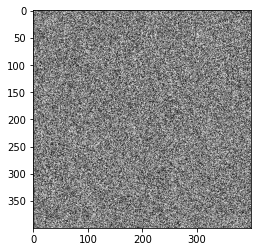

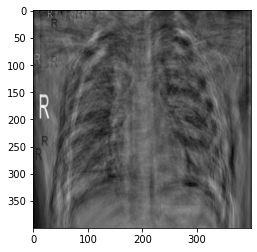

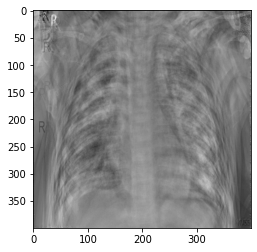

In [ ]:
#reconstruct randomly generated array with the principle components!
low = np.min(lungs_n)
high = np.max(lungs_n)
a = np.random.randint(low, high, (D*D,1))
viewcolumn(a)


c = U_n.T @ (a - mean_n)
zhat = U_n @ c + mean_n
viewcolumn(zhat)

c = U_s.T @ (a - mean_s)
zhat = U_s @ c + mean_s
viewcolumn(zhat)


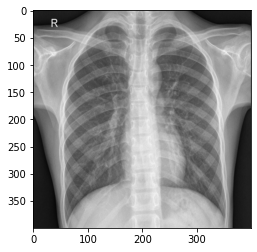

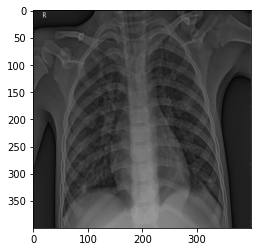

In [ ]:
#remove first x-ray from each dataset and then reconstructing it 
#with the new datasets' eigenlungs
lung_n = lungs_n[:,0][:,None]
lung_s = lungs_s[:,0][:,None]
viewcolumn(lung_n)
viewcolumn(lung_s)
lungs_n = np.delete(lungs_n, 0, axis=1)
lungs_s = np.delete(lungs_s, 0, axis=1)

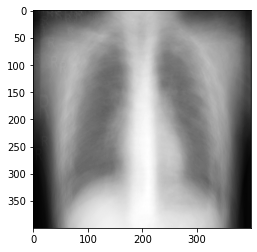

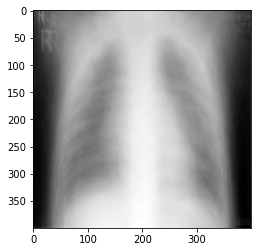

In [ ]:
mean_n = np.mean(lungs_n, axis=1)[:,None]
mean_s = np.mean(lungs_s, axis=1)[:,None]
viewcolumn(mean_n)
viewcolumn(mean_s)

In [ ]:
A_n = lungs_n - mean_n
cov_n = np.divide(A_n.T@A_n, N)

A_s = lungs_s - mean_s
cov_s = np.divide(A_s.T@A_s, N)

In [ ]:
eigvals_n, V_n = np.linalg.eig(cov_n)
Vsort_n, Dsort_n = eigsort(V_n, eigvals_n)

eigvals_s, V_s = np.linalg.eig(cov_s)
Vsort_s, Dsort_s = eigsort(V_s, eigvals_s)

In [ ]:
U_n = A_n@V_n
U_n = normc(U_n)

U_s = A_s@V_s
U_s = normc(U_s)

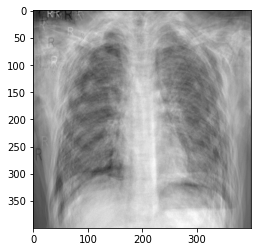

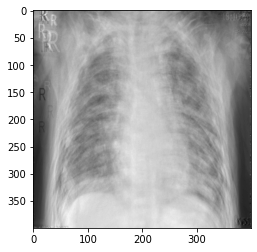

In [ ]:

c_n = U_n.T @ (lung_n - mean_n)
zhat_n = U_n @ c_n + mean_n
viewcolumn(zhat_n)

c_s = U_s.T @ (lung_s - mean_s)
zhat_s = U_s @ c_s + mean_s
viewcolumn(zhat_s)